Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
The following object is masked _by_ .GlobalEnv:

    female

The following objects are masked from biden_data (pos = 3):

    age, biden, dem, educ, female, rep

The following objects are masked from biden_data (pos = 4):

    age, biden, dem, educ, female, rep

The following objects are masked from biden_data (pos = 5):

    age, biden, dem, educ, female, rep

The following objects are masked from biden_data (pos = 10):

    age, biden, dem, educ, female, rep

The following objects are masked from biden_data (pos = 11):

    age, biden, dem, educ, female, rep

The following objects are masked from biden_data (pos = 12):

    age, biden, dem, educ, female, rep

The following objects are masked from biden_data (pos = 13):

    age, biden, dem, educ, female, rep

The following objects are masked from biden_data (pos = 14):

    age, biden, dem, educ, female, rep

The following objects are masked from biden_data

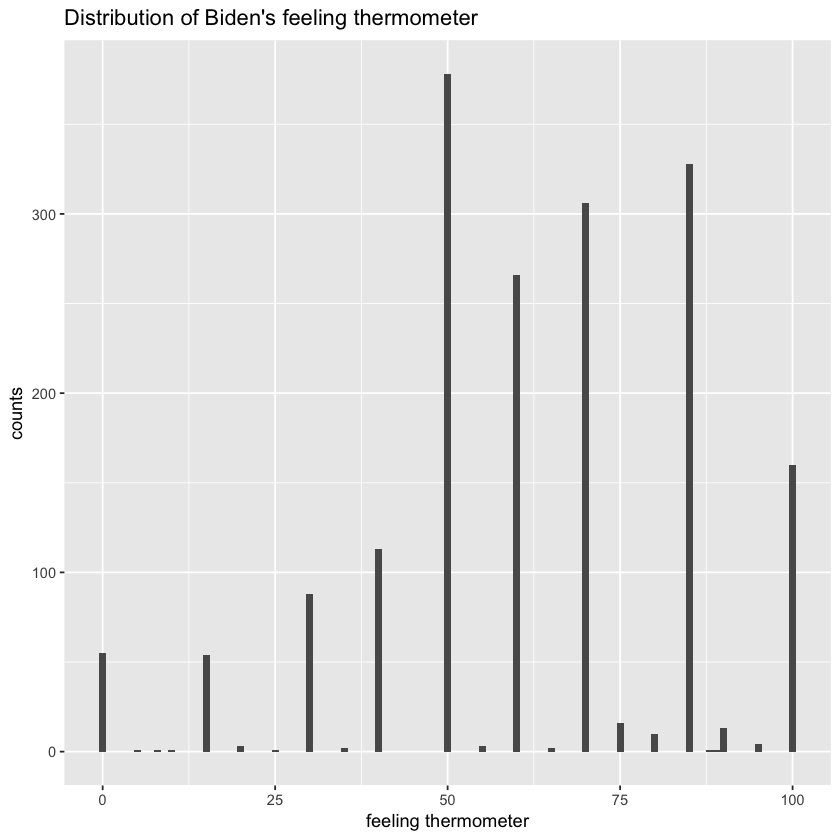

In [325]:
###problem 1 
library(ggplot2)
install.packages("dplyr")
library(dplyr)
library(ggplot2)
library(tidyr)
library(modelr)
library(broom)

biden_data <- read.csv(file = 'biden.csv', header = T)
attach(biden_data)
ggplot(data = biden_data, aes(x=biden)) +
  geom_histogram(binwidth = 1) + 
  labs(title = "Distribution of Biden's feeling thermometer",x = "feeling thermometer",y = "counts")



Problem 1:


There are some interesting features shown by the histogram. Answer given by people are not cover all intergers. Most people will give a number looks like of 50,55,60,65,70. What's more, most feeling thermometer towards Biden are in the range of 50-80, which can indicate positive feeling of people.


##################################

Problem 2 simple linear regression
##################################

In [327]:
lm.fit1 = lm(biden~age, data = biden_data)
summary(lm.fit1)


Call:
lm(formula = biden ~ age, data = biden_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-64.876 -12.318  -1.257  21.684  39.617 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 59.19736    1.64792   35.92   <2e-16 ***
age          0.06241    0.03267    1.91   0.0563 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 23.44 on 1805 degrees of freedom
Multiple R-squared:  0.002018,	Adjusted R-squared:  0.001465 
F-statistic: 3.649 on 1 and 1805 DF,  p-value: 0.05626


Simple Linear Regression:
The statistics of the linear regression are shown as the table above.

1&2&3.Is there a relationship between the predictor and the response?

The relationship between the predictor and the response is not statistics significant.From the 0.0563 p-value, we could notice the p-value > 0.05, so we accept the H0. This indicate that relationship between the predictor and the response is not strong. 

The relationship between the predictor and the response is positive. When predictor increase one unit, the response whill increase 0.06241.

4.Report the R2 of the model. What percentage of the variation in biden does age alone explain? Is this a good or bad model?
The mutiple R2 of the model = 0.002018, and this indicate only 0.2% of the variation in biden does age alone explain. This is a bad model.


In [79]:
##5.
#use augment to generate predictions
pred_aug <- augment(lm.fit1, newdata = data_frame(age = c(45)))
# Calculate 95% confidence intervals
(pred_ci <- mutate(pred_aug,
                   ymin = .fitted - .se.fit * 1.96,
                   ymax = .fitted + .se.fit * 1.96))


age,.fitted,.se.fit,ymin,ymax
45,62.0056,0.5577123,60.91248,63.09872


5.What is the predicted biden associated with an age of 45? What are the associated 95% confidence intervals?
The predicted biden associated with an age of 45 is .fitted value 62.0056, and the associated 95% confidence intervals is (60.91248, 63.09872). 

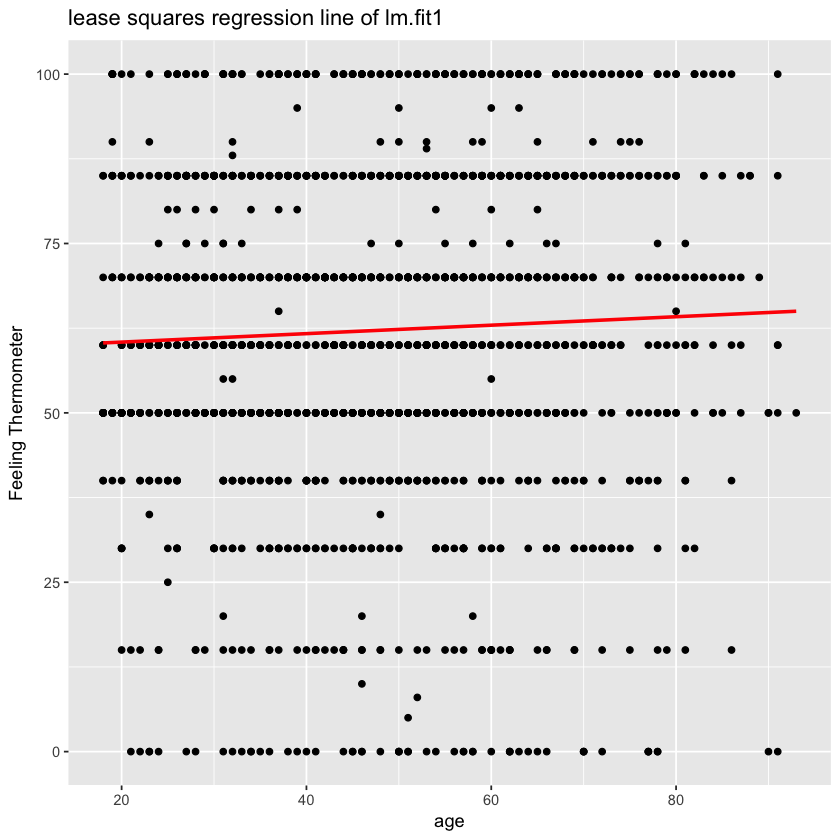

In [328]:
#6.
#Plot the response and predictor. Draw the least squares regression line.
grid <- biden_data %>% 
  data_grid(age) 

grid <- grid %>% 
  add_predictions(lm.fit1) 

ggplot(biden_data, aes(x = age)) +
  geom_point(aes(y = biden)) +
  geom_line(aes(y = pred), data = grid, color = "red", size = 1) + 
  labs(title = 'lease squares regression line of lm.fit1', y = 'Feeling Thermometer')

########################################

Problem3. Multi linear regression
########################################


In [331]:
##Multi linear regression
lm.fit2 = lm(biden~age + female + educ, data = biden_data)
tidy(lm.fit2)


term,estimate,std.error,statistic,p.value
(Intercept),68.62101396,3.59600465,19.082571,4.337464e-74
age,0.04187919,0.03248579,1.289154,1.975099e-01
female,6.19606946,1.09669702,5.649755,1.863612e-08
educ,-0.88871263,0.22469183,-3.955251,7.941295e-05


Report the parameters and standard errors:
The statistics of model are presented in above table


1.Is there a statistically significant relationship between the predictors and response?

From the tidy()data, p-value, we could know that only age variable has p-value(0.198) >0.05, which means it does not has significant relationship with predictors. 'female' and 'educ'are statistically significant.

2.What does the parameter for female suggest?

The coefficient for 'female' is 6.196, that means there will be on average 6.2 points higher if the respondent is female.

In [330]:
summary(lm.fit2)


Call:
lm(formula = biden ~ age + female + educ, data = biden_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-67.084 -14.662   0.703  18.847  45.105 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 68.62101    3.59600  19.083  < 2e-16 ***
age          0.04188    0.03249   1.289    0.198    
female       6.19607    1.09670   5.650 1.86e-08 ***
educ        -0.88871    0.22469  -3.955 7.94e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 23.16 on 1803 degrees of freedom
Multiple R-squared:  0.02723,	Adjusted R-squared:  0.02561 
F-statistic: 16.82 on 3 and 1803 DF,  p-value: 8.876e-11


3.The value of mutiple R-square is 0.02723, which is quiet small. It means only 2.8% of variation in biden does age, gender, and education explain. Compare to the R-square of lm.fit1  0.002018, lm.fit2 is a better model.  

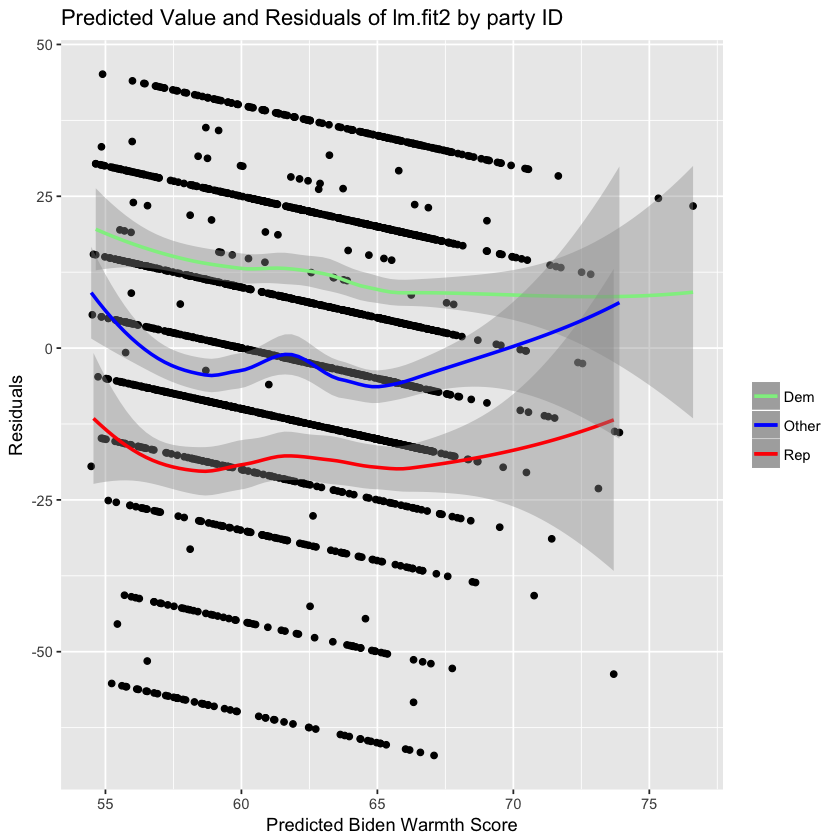

In [372]:
grid2 <- augment(lm.fit2, biden_data)

#get different subset by party ID
grid_dem1 <-grid2[grid2$dem ==1,]
grid_rep1 <-grid2[grid2$rep ==1,]
grid_other1 <-grid2[(grid2$dem ==0) & (grid2$rep ==0),]

ggplot(grid2, aes(.fitted, .resid)) +
  geom_point() +
  geom_smooth(method = 'loess', aes(y = .resid , color = 'Dem'), data = grid_dem1, size = 1) +
  geom_smooth(method = 'loess', aes(y = .resid, color = 'Rep'), data = grid_rep1, size = 1) +
  geom_smooth(method = 'loess', aes(y = .resid, color = 'Other'), data = grid_other1, size = 1) +
  scale_colour_manual("", values = c("Dem"="lightgreen","Rep"="red", "Other"="blue")) +
  labs(title = "Predicted Value and Residuals of lm.fit2 by party ID",
        x = "Predicted Biden Warmth Score",
        y = "Residuals")


4.This model seems has several problems. First, from the plot, We could clearly see there is a pattern in residual scatter plot. Actually, if the model fit well, the residual should randomly distributed with mean = 0. It should not has certain pattern. Second, the three different party types have different biden score value. So we need to add party ID variables in our model to make it more accurate.

######################################################################

Problem 4: Multiple linear regression model (with even more variables!) 
######################################################################

In [367]:
#Muti linear regression model (more varibales)
lm.fit3 = lm(biden~ age + female + educ + dem + rep, data = biden_data)
tidy(lm.fit3)

term,estimate,std.error,statistic,p.value
(Intercept),58.81125899,3.1244366,18.822996,2.694143e-72
age,0.04825892,0.0282474,1.708438,8.772744e-02
female,4.10323009,0.9482286,4.327258,1.592601e-05
educ,-0.34533479,0.1947796,-1.772952,7.640571e-02
dem,15.42425563,1.0680327,14.441745,8.144928e-45
rep,-15.84950614,1.3113624,-12.086290,2.157309e-32


Report the parameters and standard errors:

Statistcs are show in above table.

1.Did the relationship between gender and Biden warmth change?

The relationship between gender and Biden warmth slightly change. For lm.fit2, the gender parameter = 6.19607, and it p-value = 1.86e-08. In lm.fit3, the gender parameter = 4.10323009 and it p-value = 1.592601e-05.The gender parameter decrease a little bit. However, both p-value show the significant relationship between gender and biden.

In [368]:
summary(lm.fit3)


Call:
lm(formula = biden ~ age + female + educ + dem + rep, data = biden_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-75.546 -11.295   1.018  12.776  53.977 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  58.81126    3.12444  18.823  < 2e-16 ***
age           0.04826    0.02825   1.708   0.0877 .  
female        4.10323    0.94823   4.327 1.59e-05 ***
educ         -0.34533    0.19478  -1.773   0.0764 .  
dem          15.42426    1.06803  14.442  < 2e-16 ***
rep         -15.84951    1.31136 -12.086  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 19.91 on 1801 degrees of freedom
Multiple R-squared:  0.2815,	Adjusted R-squared:  0.2795 
F-statistic: 141.1 on 5 and 1801 DF,  p-value: < 2.2e-16


2.The mutiple R2 of the model is 0.2815, which means the percentage of the variation in biden does all variables explain is 28%.Compare with lm.fit2's R2 (0.027230), this is a better model.

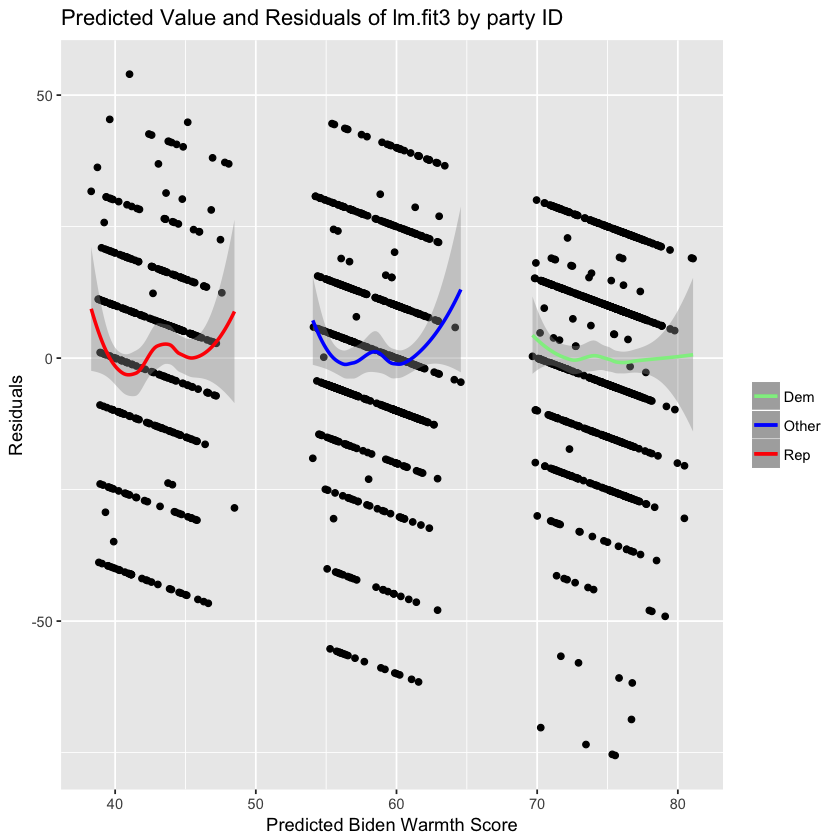

In [371]:
grid3 <- augment(lm.fit3, biden_data)

#get different subset by party ID
grid_dem2 <-grid3[grid3$dem ==1,]
grid_rep2 <-grid3[grid3$rep ==1,]
grid_other2 <-grid3[(grid3$dem ==0) & (grid3$rep ==0),]

ggplot(grid3, aes(.fitted, .resid)) +
  geom_point() +
  geom_smooth(method = 'loess', aes(y = .resid , color = 'Dem'), data = grid_dem2, size = 1) +
  geom_smooth(method = 'loess', aes(y = .resid, color = 'Rep'), data = grid_rep2, size = 1) +
  geom_smooth(method = 'loess', aes(y = .resid, color = 'Other'), data = grid_other2, size = 1) +
  scale_colour_manual("", values = c("Dem"="lightgreen","Rep"="red", "Other"="blue")) +
  labs(title = "Predicted Value and Residuals of lm.fit3 by party ID",
        x = "Predicted Biden Warmth Score",
        y = "Residuals")


 3.By adding variables for party ID to the regression model,we fix the previous problem. The residual value are now seems more randomly distributed around 0 now.

#############################################

problem4: Interactive Linear regression model
#############################################

In [256]:
#######
# problem5: Interactive Linear regression model
######

biden.subset <- biden_data[(rep == 1 | dem == 1),]
lm.fit4 <- lm(biden ~ female*dem, data = biden.subset)
tidy(lm.fit4)


term,estimate,std.error,statistic,p.value
(Intercept),39.382022,1.455363,27.059928,4.045546e-125
female,6.395180,2.017807,3.169371,1.568102e-03
dem,33.687514,1.834799,18.360328,3.295008e-66
female:dem,-3.945888,2.471577,-1.596506,1.106513e-01


The estimate value for intercept is 39.382022	, which means when xi = 0, the value of biden.
It std.error is 1.455363.

The estimate value for beta1 is 6.395180, which means the change of biden when age increase one unit.
It std.error is 2.017807.

The estimate value for beta2 is 33.687514, which means the change of biden when female increase one unit.
It std.error is 1.834799.

The coefficient for gender and dem interaction term is -3.945888, which means the change of biden when female increase one unit.
It std.error is 2.471577.


In [254]:
#get predictions
grid4 <- biden.subset %>% 
  data_grid(female, dem)
grid4 <- grid4 %>% 
  add_predictions(lm.fit4)

#use augment to generate predictions
pred_aug <- augment(lm.fit4, newdata = grid4)
# Calculate 95% confidence intervals
(pred_ci <- mutate(pred_aug,
                   ymin = .fitted - .se.fit * 1.96,
                   ymax = .fitted + .se.fit * 1.96))

female,dem,pred
0,0,39.38202
0,1,73.06954
1,0,45.77720
1,1,75.51883


female,dem,pred,.fitted,.se.fit,ymin,ymax
0,0,39.38202,39.38202,1.4553632,36.52951,42.23453
0,1,73.06954,73.06954,1.1173209,70.87959,75.25949
1,0,45.77720,45.77720,1.3976638,43.03778,48.51662
1,1,75.51883,75.51883,0.8881114,73.77813,77.25953


1.the predicted Biden warmth feeling thermometer ratings and 95% confidence intervals for female Democrats respectively are 75.51883, (73.77813,77.25953); for female republicans are respectively 45.77720,(43.03778,48.51662);for male Democrats are repectively 73.06954, (70.87959,75.25949) and for male Republicans are repectively 39.38202,(36.52951, 42.23453).

Gender variables will make less impact on Biden warmth. The predictive value of biden warmth feeling thermometer for female Democrates and female Republicans are roughly 4 higher then that of men in average. This means, female always hold a little bit higher predictive value of biden warmth feeling then man.

However, party Id will make big difference on biden warmth feeling. Male democrats's predicted biden value are almost two time of that of male repulicans. The same thing can be observed in female party. Female democrats's predicted biden value is  75.51883, however that of demale republicans is only 45.77720



